The objective is to conduct prediction analysis with ARIMA model and exponential smoothing

In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator

#for prediction
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

Read the csv file

In [4]:
file= "english_tweets.csv"
twitter_df= pd.read_csv(file, index_col=0)

#converting created_at to datetime columm
twitter_df["created_at"]= pd.to_datetime(twitter_df["created_at"])

Separating the data for trump and biden

In [5]:
trump_df= twitter_df[twitter_df["candidate"]=="trump_df"]
biden_df= twitter_df[twitter_df["candidate"]=="biden_df"]

Counting likes and retweets for Trump

In [6]:
trump_count= trump_df.resample("D", on='created_at')["likes", "retweet_count"].sum()
trump_count= trump_count.reset_index()

Counting likes and retweets for Biden

In [7]:
biden_count= biden_df.resample("D", on='created_at')["likes", "retweet_count"].sum()
biden_count= biden_count.reset_index()

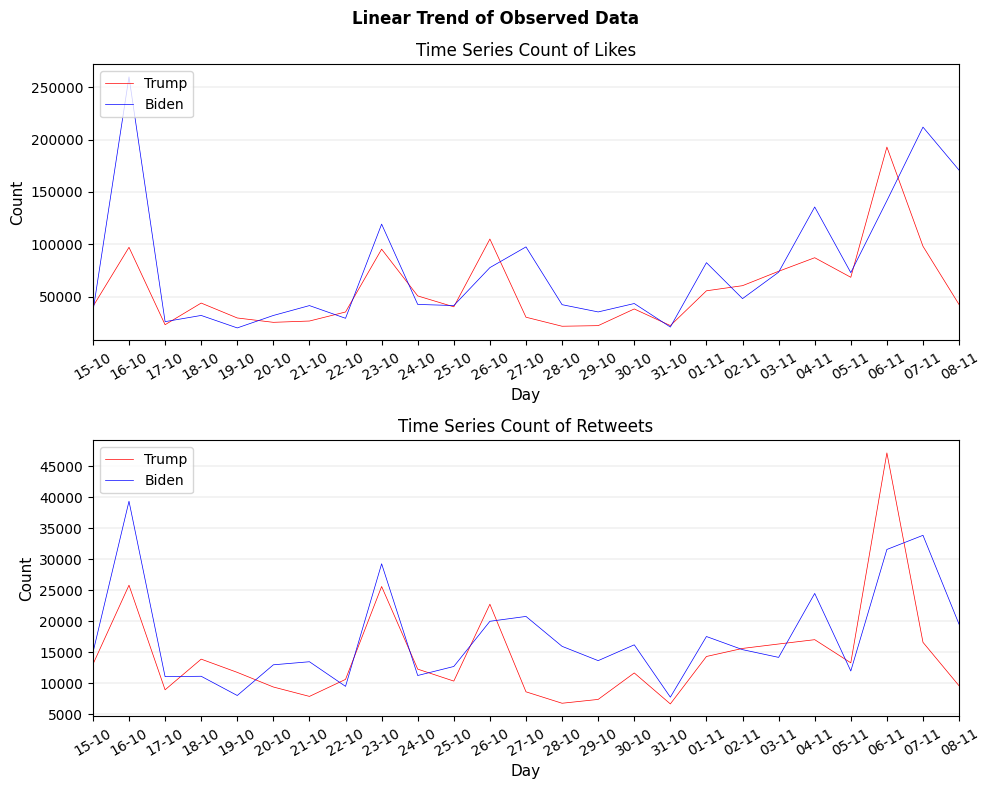

In [11]:
fig, axes = plt.subplots(2, 1)
fig.set_size_inches(10, 8)

# Define the columns to plot for each subplot
columns_1 = ["likes", "retweet_count"]
titles = ["Likes", "Retweets"]

for index, ax in enumerate(axes.flat):
    trump_count.plot(ax=ax, x="created_at", y=columns_1[index], color="red", linewidth=0.5, label="Trump", legend=False)
    biden_count.plot(ax=ax, x="created_at", y=columns_1[index], color="blue", label="Biden", linewidth=0.5, legend=False)
    
    # Remove any existing legend to avoid duplicates
    if ax.get_legend() is not None:
        ax.get_legend().remove()

    # Show the legend
    ax.legend(["Trump", "Biden"], loc="upper left")

    # Set major ticks to daily interval
    ax.xaxis.set_major_locator(DayLocator())  # Show ticks for each day
    ax.xaxis.set_major_formatter(DateFormatter('%d-%m'))  # Set the date format
    
    #train and test ARIMA model for both Biden and Trump
    train_lim= int(len(trump_count) * 0.80)
    
    #for trump
    train_trump, test_trump=

    # Annotate MSE, R^2, and p-values on the plot
    #ax.annotate(f'For Trump:\nMSE: {mse_trump:.2f}\n$R^2$: {r2_trump:.2f}\np-value: {p_value_trump:.4f}', 
                #xy=(0.3, 0.750), xycoords='axes fraction', color='red', fontsize=8)
    
    #ax.annotate(f'For Biden:\nMSE: {mse_biden:.2f}\nBiden $R^2$: {r2_biden:.2f}\np-value: {p_value_biden:.4f}', 
                #xy=(0.5, 0.75), xycoords='axes fraction', color='blue', fontsize=8)

    ax.set_xlabel("Day", fontsize=11)
    ax.set_ylabel("Count", fontsize=11)
    ax.yaxis.grid(True, linewidth=0.2)
    ax.set_title(f"Time Series Count of {titles[index]}")

# Rotate x-tick labels for both subplots
for ax in axes.flat:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=30)

plt.suptitle("Linear Trend of Observed Data", fontweight="bold")
plt.tight_layout()

plt.savefig("Figure/1_1_Linear_trend_Observed.png")
plt.show()